In [97]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [98]:
from pandas import read_csv
data = read_csv('Model_D.csv', header=0, delimiter=';')

In [99]:
if 'ppnnr' in data:
	data = data.drop(['ppnnr'], axis='columns')
# if 'DatInfo' in data:
# 	data = data.drop(['DatInfo'],axis='columns')
# if 'Datbloed' in data:
# 	data = data.drop(['Datbloed'],axis='columns')
# if 'DatMRI' in data:
# 	data = data.drop(['DatMRI'],axis='columns')
# if 'Symp_Inf_code' in data:
# 	data = data.drop(['Symp_Inf_code'],axis='columns')	
#if 'Symp_Inf_aanw' in data:
#	data = data.drop(['Symp_Inf_aanw'], axis='columns')
#if 'PF4' in data:
#	data = data.drop(['PF4'], axis='columns')
#if 'MPO' in data:
#	data = data.drop(['MPO'], axis='columns')
#if 'fractalkine' in data:
#	data = data.drop(['fractalkine'], axis='columns')
#if 'B-TG' in data:
#	data = data.drop(['B-TG'], axis='columns')

In [100]:
data = data.dropna()
data.head()

,Group,geslacht,leeftijd,BMI,SBP,DBP,Coronairl,Hypertensie,DM,Hyperchol,...,WMH_PVD_ext,PVS_BG_ext,PVS_CS_ext,MB_totaal_aanw,PF4,MPO,Fractalkine,B-TG,DNA-MPO,S100A8/A9
0,1,1,78,27.968016,147.5,83.5,0,0,0,1,...,1.0,1.0,1.0,0.0,579.617796,50.930128,0.00000,649.604336,2.603638,370.576566
1,1,2,65,22.656250,133.5,84.0,0,1,0,1,...,1.0,0.0,1.0,0.0,1476.815336,69.737767,0.00000,838.501862,1.700917,457.971595
2,1,2,55,31.202564,182.0,113.0,0,1,0,1,...,0.0,0.0,1.0,0.0,1069.126605,37.032702,0.00000,400.040008,3.225035,469.090441
3,1,1,46,32.824138,152.5,93.5,1,1,0,1,...,0.0,0.0,1.0,0.0,791.899402,286.256432,0.68914,795.610229,1.405755,404.603012
4,1,1,63,25.689562,140.0,82.5,0,0,0,1,...,0.0,0.0,1.0,0.0,563.766732,80.222767,0.00000,585.001695,2.226686,238.159000


In [101]:
data['Group'].replace({2: 1}, inplace=True)
data['Group'].replace({3: 2}, inplace=True)
data.head()
print(data['Group'].value_counts())

1    78
2    36
Name: Group, dtype: int64


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Group'],axis='columns'),data['Group'],test_size=0.2)

In [103]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
X_train_enc = trans.fit_transform(X_train)
X_test_enc = trans.fit_transform(X_test)

In [104]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score = True)
model.fit(X_train_enc, y_train)

RandomForestClassifier(oob_score=True)

In [105]:
print(model.oob_score_)

0.7472527472527473


In [106]:
model.score(X_test_enc,y_test)

0.6086956521739131

In [107]:
model.feature_importances_

array([0.00330881, 0.04746121, 0.05880812, 0.06383111, 0.05992462,
       0.00380981, 0.00773656, 0.00540361, 0.02020298, 0.00080936,
       0.00511807, 0.03235637, 0.04154882, 0.01119355, 0.1225918 ,
       0.0355536 , 0.03607154, 0.05074129, 0.04434122, 0.04963653,
       0.01133951, 0.00135827, 0.04245776, 0.08491714, 0.02265942,
       0.04031569, 0.04709625, 0.04940698])

In [108]:
import numpy as np

In [109]:
features = data.columns.values
#features = features[(features != 'Group') & (features != 'Symp_Inf_aanw')]
features = features[(features != 'Group')]
features

array(['geslacht', 'leeftijd', 'BMI', 'SBP', 'DBP', 'Coronairl',
       'Hypertensie', 'DM', 'Hyperchol', 'Perifeervaat', 'Roken', 'Gluc',
       'Kreat', 'MDRD', 'LDL', 'HDL', 'Trigly', 'Old_Inf_aanw',
       'WMH_PVD_ext', 'PVS_BG_ext', 'PVS_CS_ext', 'MB_totaal_aanw', 'PF4',
       'MPO', 'Fractalkine', 'B-TG', 'DNA-MPO', 'S100A8/A9'], dtype=object)

In [110]:
import pandas as pd
coefficients = pd.DataFrame({'Feature': features, 'Weight':model.feature_importances_}, columns=['Feature', 'Weight'])

In [111]:
coefficients = coefficients.sort_values('Weight', ascending = False)
coefficients = coefficients.reset_index()
for i in range(len(coefficients.index)):
    print('Feature %s: %.5f' % (coefficients.at[i,'Feature'], coefficients.at[i,'Weight']))

Feature LDL: 0.12259
Feature MPO: 0.08492
Feature SBP: 0.06383
Feature DBP: 0.05992
Feature BMI: 0.05881
Feature Old_Inf_aanw: 0.05074
Feature PVS_BG_ext: 0.04964
Feature S100A8/A9: 0.04941
Feature leeftijd: 0.04746
Feature DNA-MPO: 0.04710
Feature WMH_PVD_ext: 0.04434
Feature PF4: 0.04246
Feature Kreat: 0.04155
Feature B-TG: 0.04032
Feature Trigly: 0.03607
Feature HDL: 0.03555
Feature Gluc: 0.03236
Feature Fractalkine: 0.02266
Feature Hyperchol: 0.02020
Feature PVS_CS_ext: 0.01134
Feature MDRD: 0.01119
Feature Hypertensie: 0.00774
Feature DM: 0.00540
Feature Roken: 0.00512
Feature Coronairl: 0.00381
Feature geslacht: 0.00331
Feature MB_totaal_aanw: 0.00136
Feature Perifeervaat: 0.00081


In [112]:
# Make predictions for the test set
y_pred_test = model.predict(X_test_enc)

# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred_test)
print(CM)

[[14  1]
 [ 8  0]]


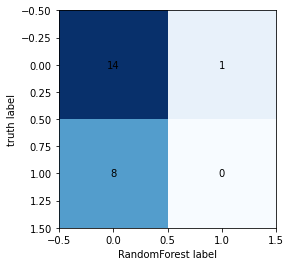

In [113]:
import matplotlib.pyplot as plt
# Visualize it as a heatmap
# Plot confusion matrix
plt.imshow(CM,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(CM):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("RandomForest label")
plt.ylabel("truth label")
plt.show()